<p style="text-align:center">
    <a href="https://skills.network" target="_blank">
    <img src="https://cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud/assets/logos/SN_web_lightmode.png" width="200" alt="Skills Network Logo"  />
    </a>
</p>


# <a id='toc1_'></a>[Deep Neural Network for Breast Cancer Classification](#toc0_)


Estimated time needed: **30** minutes


This tutorial demonstrates how to build and train a deep neural network for classification using the PyTorch library. The dataset used is the Breast Cancer Wisconsin (Diagnostic) Data Set.


**Table of contents**<a id='toc0_'></a>    
- [Deep Neural Network for Breast Cancer Classification](#toc1_)    
  - [Objectives](#toc1_1_)    
  - [Background](#toc1_2_)    
    - [What is PyTorch](#toc1_2_1_)    
  - [Setup](#toc1_3_)    
    - [Installing Required Libraries](#toc1_3_1_)    
  - [Load the Data](#toc1_4_)    
    - [Breast Cancer Wisconsin (Diagnostic)](#toc1_4_1_)    
  - [Data Preprocessing](#toc1_5_)    
  - [Build and Train the Neural Network Model](#toc1_6_)    
  - [Visualize the Training and Test Loss](#toc1_7_)    
  - [Exercises](#toc1_8_)    
    - [Exercise 1 - Change to different optimizer: SGD](#toc1_8_1_)    
    - [Exercise 2 - Change the number of neurons](#toc1_8_2_)    
    - [Exercise 3 - Try different dataset - Iris Dataset](#toc1_8_3_)    
  - [Authors](#toc1_9_)    
  - [Contributors](#toc1_10_)    


## <a id='toc1_1_'></a>[Objectives](#toc0_)

After completing this lab you will be able to:

 - Use PyTorch to build and train a deep neural network for classification.


## <a id='toc1_2_'></a>[Background](#toc0_)

### <a id='toc1_2_1_'></a>[What is PyTorch](#toc0_)

[PyTorch](https://pytorch.org/) is an open-source machine learning library, developed by Facebook's AI Research lab (FAIR). It is primarily used for applications in areas such as computer vision and natural language processing.

**Common Uses of PyTorch**

- **Developing Deep Learning Models**: From standard feed-forward networks to complex neural networks like CNNs and RNNs.
- **Research and Experimentation**: Facilitates rapid prototyping, which is highly valued in academic and research settings.
- **Production Deployment**: With the support of TorchServe, PyTorch models can be easily transitioned from research to production environments.


----


## <a id='toc1_3_'></a>[Setup](#toc0_)

For this lab, we will be using the following libraries:

*   [`pandas`](https://pandas.pydata.org/) for managing the data.
*   [`numpy`](https://numpy.org/) for mathematical operations.
*   [`matplotlib`](https://matplotlib.org/) for additional plotting tools.
*   [`sklearn`](https://scikit-learn.org/stable/) for machine learning and machine-learning-pipeline related functions.
*   [`torch`](https://pytorch.org/) for building and training the deep neural network.
*   [`ucimlrepo`](https://pypi.org/project/ucimlrepo/) for loading the dataset.


### <a id='toc1_3_1_'></a>[Installing Required Libraries](#toc0_)


In [1]:
%pip install pandas==2.2.2
%pip install numpy==1.26.4
%pip install matplotlib==3.8.0
%pip install scikit-learn==1.5.0
%pip install torch==2.3.1
%pip install ucimlrepo==0.0.7

Note: you may need to restart the kernel to use updated packages.
Note: you may need to restart the kernel to use updated packages.
Note: you may need to restart the kernel to use updated packages.
Note: you may need to restart the kernel to use updated packages.
Note: you may need to restart the kernel to use updated packages.
Note: you may need to restart the kernel to use updated packages.


## <a id='toc1_4_'></a>[Load the Data](#toc0_)

### <a id='toc1_4_1_'></a>[Breast Cancer Wisconsin (Diagnostic)](#toc0_)

The [Breast Cancer Wisconsin (Diagnostic) dataset](https://archive.ics.uci.edu/ml/datasets/Breast+Cancer+Wisconsin+(Diagnostic)) is a classic dataset used for classification tasks. It contains 569 samples of breast cancer cells, each with 30 features. The dataset is divided into two classes: benign and malignant. The goal is to classify the breast cancer cells into one of the two classes.

This dataset is free to use and is licensed under a Creative Commons Attribution 4.0 International (CC BY 4.0) license.

First, we need to load our dataset and take a look at its structure.


In [2]:
from ucimlrepo import fetch_ucirepo 
  
# fetch dataset 
breast_cancer_wisconsin_diagnostic = fetch_ucirepo(id=17) 
  
# data (as pandas dataframes) 
X = breast_cancer_wisconsin_diagnostic.data.features 
y = breast_cancer_wisconsin_diagnostic.data.targets 

# print the first few rows of the data
display(X.head())

# print the first few rows of the target
display(y.head())

,radius1,texture1,perimeter1,area1,smoothness1,compactness1,concavity1,concave_points1,symmetry1,fractal_dimension1,...,radius3,texture3,perimeter3,area3,smoothness3,compactness3,concavity3,concave_points3,symmetry3,fractal_dimension3
0,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.3001,0.14710,0.2419,0.07871,...,25.38,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890
1,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,0.1812,0.05667,...,24.99,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902
2,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,0.2069,0.05999,...,23.57,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758
3,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.10520,0.2597,0.09744,...,14.91,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300
4,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.10430,0.1809,0.05883,...,22.54,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678


,Diagnosis
0,M
1,M
2,M
3,M
4,M


Then let us check the shape of the dataset.


In [3]:
display(f'X shape: {X.shape}')
display(f'y shape: {y.shape}')

'X shape: (569, 30)'

'y shape: (569, 1)'

As we can see, the dataset has 569 samples and 30 features. The target variable is the diagnosis column, which contains the class labels for each sample. The class labels are either 'M' (malignant) or 'B' (benign).

We will then check the distribution of the target variable.


In [4]:
display(y['Diagnosis'].value_counts())

Diagnosis
B    357
M    212
Name: count, dtype: int64

Note that the dataset is **imbalanced**, with more benign samples than malignant samples. 

We will now process the data. Randomly choose 200 samples in 'M' (malignant) and 200 samples in 'B' (benign).


In [5]:
import pandas as pd

# Combine features and target into a single DataFrame for easier manipulation
data = pd.concat([X, y], axis=1)

# Separate the two classes
data_B = data[data['Diagnosis'] == 'B']
data_M = data[data['Diagnosis'] == 'M']

# Select 200 samples from each class
data_B = data_B.sample(n=200, random_state=42)
data_M = data_M.sample(n=200, random_state=42)

# Combine the two classes
balanced_data = pd.concat([data_B, data_M])

display(balanced_data['Diagnosis'].value_counts())

Diagnosis
B    200
M    200
Name: count, dtype: int64

There are 200 samples in each class, with a total of 400 samples. It means that the dataset is balanced.

We will use 80% of the samples for training and 20% for testing.


## <a id='toc1_5_'></a>[Data Preprocessing](#toc0_)

Before feeding the data into our neural network, we need to preprocess it. This involves separating the features and labels, splitting the data into training and test sets, and standardizing the feature values.


In [6]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
import torch

# Separate features and targets
X = balanced_data.drop('Diagnosis', axis=1)
y = balanced_data['Diagnosis']

# Convert the targets to binary labels
y = y.map({'B': 0, 'M': 1})

display(X)
display(y)

,radius1,texture1,perimeter1,area1,smoothness1,compactness1,concavity1,concave_points1,symmetry1,fractal_dimension1,...,radius3,texture3,perimeter3,area3,smoothness3,compactness3,concavity3,concave_points3,symmetry3,fractal_dimension3
395,14.060,17.18,89.75,609.1,0.08045,0.05361,0.026810,0.03251,0.1641,0.05764,...,14.92,25.34,96.42,684.5,0.10660,0.12310,0.08460,0.07911,0.2523,0.06609
110,9.777,16.99,62.50,290.2,0.10370,0.08404,0.043340,0.01778,0.1584,0.07065,...,11.05,21.47,71.68,367.0,0.14670,0.17650,0.13000,0.05334,0.2533,0.08468
481,13.900,19.24,88.73,602.9,0.07991,0.05326,0.029950,0.02070,0.1579,0.05594,...,16.41,26.42,104.40,830.5,0.10640,0.14150,0.16730,0.08150,0.2356,0.07603
493,12.460,12.83,78.83,477.3,0.07372,0.04043,0.007173,0.01149,0.1613,0.06013,...,13.19,16.36,83.24,534.0,0.09439,0.06477,0.01674,0.02680,0.2280,0.07028
136,11.710,16.67,74.72,423.6,0.10510,0.06095,0.035920,0.02600,0.1339,0.05945,...,13.33,25.48,86.16,546.7,0.12710,0.10280,0.10460,0.06968,0.1712,0.07343
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
257,15.320,17.27,103.20,713.3,0.13350,0.22840,0.244800,0.12420,0.2398,0.07596,...,17.73,22.66,119.80,928.8,0.17650,0.45030,0.44290,0.22290,0.3258,0.11910
328,16.270,20.71,106.90,813.7,0.11690,0.13190,0.147800,0.08488,0.1948,0.06277,...,19.28,30.38,129.80,1121.0,0.15900,0.29470,0.35970,0.15830,0.3103,0.08200
199,14.450,20.22,94.49,642.7,0.09872,0.12060,0.118000,0.05980,0.1950,0.06466,...,18.33,30.12,117.90,1044.0,0.15520,0.40560,0.49670,0.18380,0.4753,0.10130
194,14.860,23.21,100.40,671.4,0.10440,0.19800,0.169700,0.08878,0.1737,0.06672,...,16.08,27.78,118.60,784.7,0.13160,0.46480,0.45890,0.17270,0.3000,0.08701


395    0
110    0
481    0
493    0
136    0
      ..
257    1
328    1
199    1
194    1
223    1
Name: Diagnosis, Length: 400, dtype: int64

The data will be split into **80%** training and **20%** test sets.

We then print the shapes of the training and test sets to verify that the data has been split correctly.


In [7]:
# Split the data into training and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42, stratify=y)

display(f'X_train shape: {X_train.shape}')
display(f'y_train shape: {y_train.shape}')
display(f'X_test shape: {X_test.shape}')
display(f'y_test shape: {y_test.shape}')

'X_train shape: (320, 30)'

'y_train shape: (320,)'

'X_test shape: (80, 30)'

'y_test shape: (80,)'

Then we standardize the feature values using the `StandardScaler` from scikit-learn.

Standardizing the data involves transforming the features so that they have a mean of 0 and a standard deviation of 1. This helps in ensuring that all features contribute equally to the result and helps the model converge faster during training.

1. **Fitting the Scaler**: We calculate the mean and standard deviation for each feature in the training set using the `fit` method of the `StandardScaler`.
2. **Transforming the Training Data**: We apply the standardization to the training data using the `transform` method, which scales the features accordingly.
3. **Transforming the Test Data**: We apply the same transformation to the test data using the same scaler. This ensures that both training and test sets are standardized in the same way.

By standardizing the data, we make sure that each feature contributes equally to the training process, which helps in achieving better performance and faster convergence of the neural network model.

Finally, we convert the NumPy arrays to PyTorch tensors.


In [8]:
from torch.utils.data import DataLoader, TensorDataset

# Standardize the data
# Initialize the StandardScaler
scaler = StandardScaler()
# Fit the scaler on the training data and transform it
X_train = scaler.fit_transform(X_train)
# Transform the test data using the same scaler
X_test = scaler.transform(X_test)

# Convert to PyTorch tensors
X_train = torch.tensor(X_train, dtype=torch.float32)
X_test = torch.tensor(X_test, dtype=torch.float32)
y_train = torch.tensor(y_train.values, dtype=torch.long)
y_test = torch.tensor(y_test.values, dtype=torch.long)

# Create DataLoader for training and test sets
train_dataset = TensorDataset(X_train, y_train)
test_dataset = TensorDataset(X_test, y_test)

train_loader = DataLoader(train_dataset, batch_size=2, shuffle=True)
test_loader = DataLoader(test_dataset, batch_size=2, shuffle=False)

## <a id='toc1_6_'></a>[Build and Train the Neural Network Model](#toc0_)

We will define our neural network architecture, specify the loss function and optimizer, and then train the model.

First, we define the neural network architecture using the `nn.Module` class in PyTorch. Our model consists of an input layer, one hidden layer, and an output layer with 2 neurons corresponding to the 2 classes.

Below is an example of the neural network model, it has 8 neurons in the input layer, 8 neurons in the hidden layer, and 2 neurons in the output layer.

<img src="https://cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud/j-MFHvfzhrY04qVMsClOGA/8-8-2.jpg" alt="image" width="50%">


In [9]:
import torch.nn as nn

class ClassificationNet(nn.Module):
    def __init__(self, input_units=30, hidden_units=64, output_units=2):
        super(ClassificationNet, self).__init__()
        self.fc1 = nn.Linear(input_units, hidden_units)
        self.fc2 = nn.Linear(hidden_units, output_units)

    def forward(self, x):
        x = torch.relu(self.fc1(x))
        x = self.fc2(x)
        return x

# Instantiate the model
model = ClassificationNet(input_units=30, hidden_units=64, output_units=2)

Let us visualize the neural network architecture.


In [10]:
print(model)

ClassificationNet(
  (fc1): Linear(in_features=30, out_features=64, bias=True)
  (fc2): Linear(in_features=64, out_features=2, bias=True)
)


Then we define the loss function and optimizer. We use the `CrossEntropyLoss` loss function, which is commonly used for multi-class classification problems. The `Adam` optimizer is used to update the weights of the neural network during training.


In [11]:
import torch.optim as optim

# Define the loss function and optimizer
criterion = nn.CrossEntropyLoss()
optimizer = optim.Adam(model.parameters(), lr=0.001)


Then we can train the model using the training data. We iterate over the training data for a specified number of epochs and update the weights of the neural network using backpropagation.

During training, we calculate the loss at each epoch and print it to monitor the training progress. The loss should **decrease** over time as the model learns to classify the classes correctly.

Finally, we evaluate the model on the test data to see how well it performs on unseen data.


In [12]:
epochs = 10
train_losses = []
test_losses = []

for epoch in range(epochs):
    # Training phase
    model.train()
    running_loss = 0.0
    for X_batch, y_batch in train_loader:
        optimizer.zero_grad()
        outputs = model(X_batch)
        loss = criterion(outputs, y_batch)
        loss.backward()
        optimizer.step()
        running_loss += loss.item()

    train_loss = running_loss / len(train_loader)
    train_losses.append(train_loss)
    
    # Evaluation phase on test set
    model.eval()
    test_loss = 0.0
    with torch.no_grad():
        for X_batch, y_batch in test_loader:
            test_outputs = model(X_batch)
            loss = criterion(test_outputs, y_batch)
            test_loss += loss.item()

    test_loss /= len(test_loader)
    test_losses.append(test_loss)
    
    print(f'Epoch [{epoch + 1}/{epochs}], Train Loss: {train_loss:.4f}, Test Loss: {test_loss:.4f}')

Epoch [1/10], Train Loss: 0.2513, Test Loss: 0.1825
Epoch [2/10], Train Loss: 0.1184, Test Loss: 0.1336
Epoch [3/10], Train Loss: 0.0909, Test Loss: 0.1150
Epoch [4/10], Train Loss: 0.0848, Test Loss: 0.1029
Epoch [5/10], Train Loss: 0.0712, Test Loss: 0.0962
Epoch [6/10], Train Loss: 0.0648, Test Loss: 0.0935
Epoch [7/10], Train Loss: 0.0621, Test Loss: 0.0911
Epoch [8/10], Train Loss: 0.0555, Test Loss: 0.0879
Epoch [9/10], Train Loss: 0.0518, Test Loss: 0.0865
Epoch [10/10], Train Loss: 0.0482, Test Loss: 0.0852


## <a id='toc1_7_'></a>[Visualize the Training and Test Loss](#toc0_)

Plotting the loss curves helps us understand the training dynamics of our model.


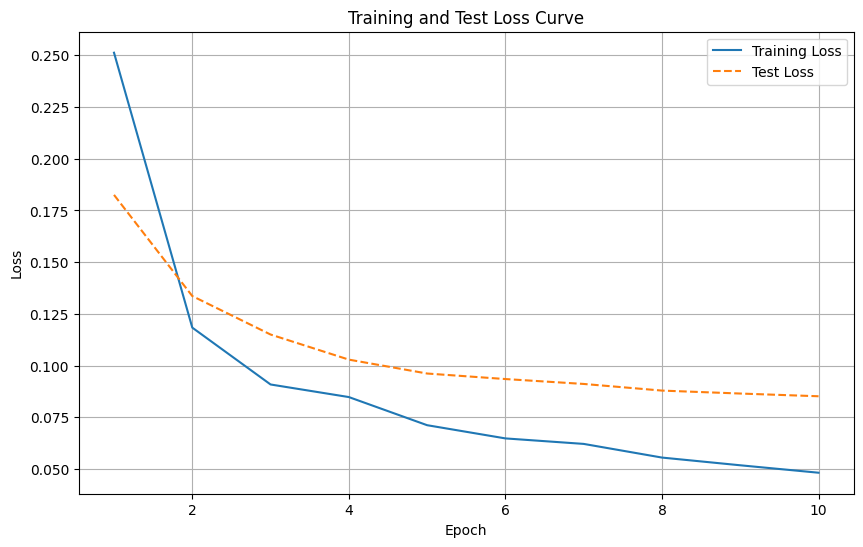

In [13]:
import matplotlib.pyplot as plt

# Plot the loss curves
plt.figure(figsize=(10, 6))
plt.plot(range(1, epochs + 1), train_losses, label='Training Loss')
plt.plot(range(1, epochs + 1), test_losses, label='Test Loss', linestyle='--')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.title('Training and Test Loss Curve')
plt.legend()
plt.grid(True)
plt.show()

## <a id='toc1_8_'></a>[Exercises](#toc0_)


### <a id='toc1_8_1_'></a>[Exercise 1 - Change to different optimizer: SGD](#toc0_)

Stochastic Gradient Descent (SGD) is a widely used optimization algorithm in machine learning and deep learning for training models. It is an iterative method for optimizing a loss function by making small updates to the model parameters in the direction of the negative gradient.

**How SGD Works**

SGD updates the model's parameters iteratively. The update rule for each parameter $\theta$ is as follows:

$$ \theta = \theta - \eta \cdot \nabla_\theta J(\theta) $$

where:
- $\theta$ represents the model parameters.
- $\eta$ (eta) is the learning rate, which controls the step size of each update.
- $\nabla_\theta J(\theta)$ is the gradient of the loss function with respect to the parameter $\theta$.

**PyTorch's `torch.optim.SGD`**

In PyTorch, the `torch.optim.SGD` optimizer provides several parameters to configure its behavior.

**Parameters**

1. **`params`**: 
   - The model parameters to optimize.
   - Typically provided as `model.parameters()`.

2. **`lr` (learning rate)**: 
   - A positive float value that controls the step size for each parameter update.
   - Example: `lr=0.01`.

3. **`momentum`** (optional): 
   - A float value that accelerates SGD in the relevant direction and dampens oscillations.
   - Example: `momentum=0.9`.

4. **`weight_decay`** (optional): 
   - A float value representing the L2 penalty (regularization term) to prevent overfitting.
   - Example: `weight_decay=0.0001`.

5. **`dampening`** (optional): 
   - A float value that reduces the effect of the momentum.
   - Default is `0`.

**Example Usage**

Here’s how you can use `torch.optim.SGD` with some of these parameters:

```python
import torch.optim as optim

# Define the SGD optimizer
optimizer = optim.SGD(model.parameters(), lr=0.001, momentum=0.9, weight_decay=0.0001)
```


Epoch [1/10], Train Loss: 0.7976, Test Loss: 0.7885
Epoch [2/10], Train Loss: 0.7976, Test Loss: 0.7885
Epoch [3/10], Train Loss: 0.7976, Test Loss: 0.7885
Epoch [4/10], Train Loss: 0.7976, Test Loss: 0.7885
Epoch [5/10], Train Loss: 0.7976, Test Loss: 0.7885
Epoch [6/10], Train Loss: 0.7976, Test Loss: 0.7885
Epoch [7/10], Train Loss: 0.7976, Test Loss: 0.7885
Epoch [8/10], Train Loss: 0.7976, Test Loss: 0.7885
Epoch [9/10], Train Loss: 0.7976, Test Loss: 0.7885
Epoch [10/10], Train Loss: 0.7976, Test Loss: 0.7885


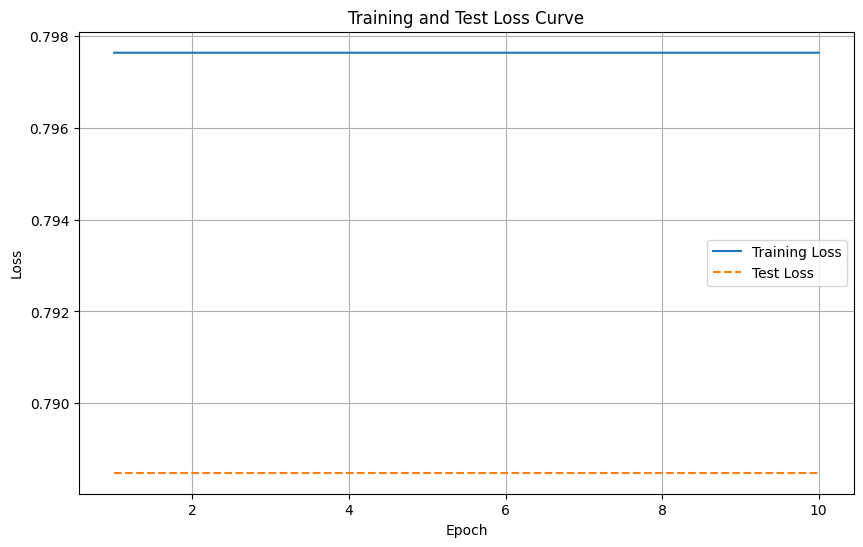

In [17]:
import torch.optim as optim

model_new_optimizer = ClassificationNet(input_units=30, hidden_units=64, output_units=2)

# Define the loss function and optimizer
criterion = nn.CrossEntropyLoss()
# optimizer = optim.Adam(model_new_optimizer.parameters(), lr=0.001) # Here, change the optimizer to SGD
optimizer = optim.SGD(model.parameters(), lr=0.001)
epochs = 10
train_losses = []
test_losses = []

for epoch in range(epochs):
    # Training phase
    model_new_optimizer.train()
    running_loss = 0.0
    for X_batch, y_batch in train_loader:
        optimizer.zero_grad()
        outputs = model_new_optimizer(X_batch)
        loss = criterion(outputs, y_batch)
        loss.backward()
        optimizer.step()
        running_loss += loss.item()

    train_loss = running_loss / len(train_loader)
    train_losses.append(train_loss)
    
    # Evaluation phase on test set
    model_new_optimizer.eval()
    test_loss = 0.0
    with torch.no_grad():
        for X_batch, y_batch in test_loader:
            test_outputs = model_new_optimizer(X_batch)
            loss = criterion(test_outputs, y_batch)
            test_loss += loss.item()

    test_loss /= len(test_loader)
    test_losses.append(test_loss)
    
    print(f'Epoch [{epoch + 1}/{epochs}], Train Loss: {train_loss:.4f}, Test Loss: {test_loss:.4f}')

import matplotlib.pyplot as plt

# Plot the loss curves
plt.figure(figsize=(10, 6))
plt.plot(range(1, epochs + 1), train_losses, label='Training Loss')
plt.plot(range(1, epochs + 1), test_losses, label='Test Loss', linestyle='--')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.title('Training and Test Loss Curve')
plt.legend()
plt.grid(True)
plt.show()

<details>
    <summary>Click here for Solution</summary>

```python
optimizer = optim.SGD(model_new_optimizer.parameters(), lr=0.001, momentum=0.9, weight_decay=0.0001) # Here, change the optimizer to SGD
```

</details>


### <a id='toc1_8_2_'></a>[Exercise 2 - Change the number of neurons](#toc0_)

Define a new neural network architecture with different neurons and see how it affects the model's performance.


Epoch [1/10], Train Loss: 0.3997, Test Loss: 0.2667
Epoch [2/10], Train Loss: 0.1676, Test Loss: 0.1795
Epoch [3/10], Train Loss: 0.1195, Test Loss: 0.1491
Epoch [4/10], Train Loss: 0.1003, Test Loss: 0.1324
Epoch [5/10], Train Loss: 0.0894, Test Loss: 0.1187
Epoch [6/10], Train Loss: 0.0814, Test Loss: 0.1163
Epoch [7/10], Train Loss: 0.0760, Test Loss: 0.1130
Epoch [8/10], Train Loss: 0.0724, Test Loss: 0.1119
Epoch [9/10], Train Loss: 0.0691, Test Loss: 0.1074
Epoch [10/10], Train Loss: 0.0657, Test Loss: 0.1058


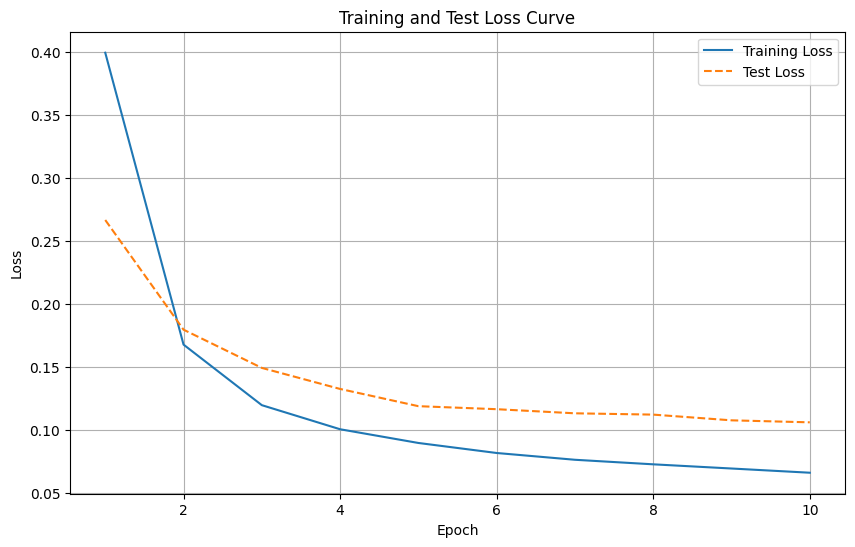

In [19]:
# Change the number of hidden units, e.g. 16.
model_new = ClassificationNet(input_units=30, hidden_units=16, output_units=2)

# Define the loss function and optimizer
criterion = nn.CrossEntropyLoss()
optimizer = optim.Adam(model_new.parameters(), lr=0.001)

epochs = 10
train_losses = []
test_losses = []

for epoch in range(epochs):
    # Training phase
    model_new.train()
    running_loss = 0.0
    for X_batch, y_batch in train_loader:
        optimizer.zero_grad()
        outputs = model_new(X_batch)
        loss = criterion(outputs, y_batch)
        loss.backward()
        optimizer.step()
        running_loss += loss.item()

    train_loss = running_loss / len(train_loader)
    train_losses.append(train_loss)
    
    # Evaluation phase on test set
    model_new.eval()
    test_loss = 0.0
    with torch.no_grad():
        for X_batch, y_batch in test_loader:
            test_outputs = model_new(X_batch)
            loss = criterion(test_outputs, y_batch)
            test_loss += loss.item()

    test_loss /= len(test_loader)
    test_losses.append(test_loss)
    
    print(f'Epoch [{epoch + 1}/{epochs}], Train Loss: {train_loss:.4f}, Test Loss: {test_loss:.4f}')

import matplotlib.pyplot as plt

# Plot the loss curves
plt.figure(figsize=(10, 6))
plt.plot(range(1, epochs + 1), train_losses, label='Training Loss')
plt.plot(range(1, epochs + 1), test_losses, label='Test Loss', linestyle='--')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.title('Training and Test Loss Curve')
plt.legend()
plt.grid(True)
plt.show()

<details>
    <summary>Click here for Solution</summary>

```python
model_new = ClassificationNet(input_units=30, hidden_units=16, output_units=2)
```

</details>


### <a id='toc1_8_3_'></a>[Exercise 3 - Try different dataset - Iris Dataset](#toc0_)

Try using the [Iris dataset](https://archive.ics.uci.edu/dataset/53/iris) for classification. The Iris dataset is a classic dataset used for classification tasks. It contains 150 samples of iris flowers, each with 4 features. The dataset is divided into three classes, with each class representing a different species of iris flower. The goal is to classify the iris flowers into one of the three classes.

This dataset is free to use and is licensed under a Creative Commons Attribution 4.0 International (CC BY 4.0) license.

You can load the Iris dataset using the following code:

```python
from sklearn.datasets import load_iris

# Load the Iris dataset
iris = load_iris()

# Extract the features and target variable
X_iris = iris.data
y_iris = iris.target
```

You can then preprocess the data, build and train the neural network model, and evaluate its performance on the test set.


Epoch [1/10], Train Loss: 0.9685, Test Loss: 0.9210
Epoch [2/10], Train Loss: 0.8757, Test Loss: 0.8288
Epoch [3/10], Train Loss: 0.7867, Test Loss: 0.7349
Epoch [4/10], Train Loss: 0.6796, Test Loss: 0.6486
Epoch [5/10], Train Loss: 0.5950, Test Loss: 0.5803
Epoch [6/10], Train Loss: 0.5279, Test Loss: 0.5304
Epoch [7/10], Train Loss: 0.4872, Test Loss: 0.4941
Epoch [8/10], Train Loss: 0.4331, Test Loss: 0.4598
Epoch [9/10], Train Loss: 0.4064, Test Loss: 0.4270
Epoch [10/10], Train Loss: 0.3761, Test Loss: 0.3987


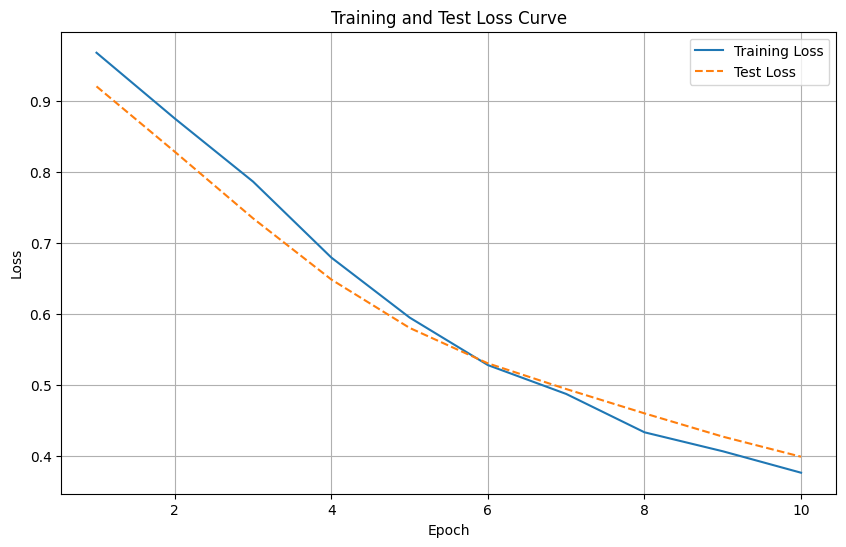

In [20]:
import torch
import torch.nn as nn
import torch.optim as optim
from torch.utils.data import DataLoader, TensorDataset
from sklearn.datasets import load_iris
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
import matplotlib.pyplot as plt

# Load the Iris dataset
iris = load_iris()

# Extract the features and target variable
X_iris = iris.data
y_iris = iris.target

# Split the data into training and test sets
X_train, X_test, y_train, y_test = train_test_split(X_iris, y_iris, test_size=0.2, random_state=42, stratify=y_iris)

# Standardize the data
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

# Convert to PyTorch tensors
X_train = torch.tensor(X_train, dtype=torch.float32)
X_test = torch.tensor(X_test, dtype=torch.float32)
y_train = torch.tensor(y_train, dtype=torch.long)
y_test = torch.tensor(y_test, dtype=torch.long)

# Create DataLoader for training and test sets
train_dataset = TensorDataset(X_train, y_train)
test_dataset = TensorDataset(X_test, y_test)

train_loader = DataLoader(train_dataset, batch_size=32, shuffle=True)
test_loader = DataLoader(test_dataset, batch_size=32, shuffle=False)

class IrisNet(nn.Module):
    def __init__(self, hidden_units=8):
        super(IrisNet, self).__init__()
        self.fc1 = nn.Linear(4, hidden_units)  # 4 input features for Iris dataset
        self.fc2 = nn.Linear(hidden_units, 3)  # 3 output classes for Iris dataset

    def forward(self, x):
        x = torch.relu(self.fc1(x))
        x = self.fc2(x)
        return x

model = IrisNet(hidden_units=8)

# Define the loss function and optimizer
criterion = nn.CrossEntropyLoss()
optimizer = optim.Adam(model.parameters(), lr=0.01)

epochs = 10
train_losses = []
test_losses = []

for epoch in range(epochs):
    # Training phase
    model.train()
    running_loss = 0.0
    for X_batch, y_batch in train_loader:
        optimizer.zero_grad()
        outputs = model(X_batch)
        loss = criterion(outputs, y_batch)
        loss.backward()
        optimizer.step()
        running_loss += loss.item()
    
    avg_train_loss = running_loss / len(train_loader)
    train_losses.append(avg_train_loss)
    
    # Evaluation phase on test set
    model.eval()
    test_loss = 0.0
    with torch.no_grad():
        for X_batch, y_batch in test_loader:
            test_outputs = model(X_batch)
            loss = criterion(test_outputs, y_batch)
            test_loss += loss.item()
    
    avg_test_loss = test_loss / len(test_loader)
    test_losses.append(avg_test_loss)

    print(f'Epoch [{epoch + 1}/{epochs}], Train Loss: {avg_train_loss:.4f}, Test Loss: {avg_test_loss:.4f}')

# Plot the loss curves
plt.figure(figsize=(10, 6))
plt.plot(range(1, epochs + 1), train_losses, label='Training Loss')
plt.plot(range(1, epochs + 1), test_losses, label='Test Loss', linestyle='--')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.title('Training and Test Loss Curve')
plt.legend()
plt.grid(True)
plt.show()

<details>
    <summary>Click here for Solution</summary>

```python
import torch
import torch.nn as nn
import torch.optim as optim
from torch.utils.data import DataLoader, TensorDataset
from sklearn.datasets import load_iris
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
import matplotlib.pyplot as plt

# Load the Iris dataset
iris = load_iris()

# Extract the features and target variable
X_iris = iris.data
y_iris = iris.target

# Split the data into training and test sets
X_train, X_test, y_train, y_test = train_test_split(X_iris, y_iris, test_size=0.2, random_state=42, stratify=y_iris)

# Standardize the data
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

# Convert to PyTorch tensors
X_train = torch.tensor(X_train, dtype=torch.float32)
X_test = torch.tensor(X_test, dtype=torch.float32)
y_train = torch.tensor(y_train, dtype=torch.long)
y_test = torch.tensor(y_test, dtype=torch.long)

# Create DataLoader for training and test sets
train_dataset = TensorDataset(X_train, y_train)
test_dataset = TensorDataset(X_test, y_test)

train_loader = DataLoader(train_dataset, batch_size=32, shuffle=True)
test_loader = DataLoader(test_dataset, batch_size=32, shuffle=False)

class IrisNet(nn.Module):
    def __init__(self, hidden_units=8):
        super(IrisNet, self).__init__()
        self.fc1 = nn.Linear(4, hidden_units)  # 4 input features for Iris dataset
        self.fc2 = nn.Linear(hidden_units, 3)  # 3 output classes for Iris dataset

    def forward(self, x):
        x = torch.relu(self.fc1(x))
        x = self.fc2(x)
        return x

model = IrisNet(hidden_units=8)

# Define the loss function and optimizer
criterion = nn.CrossEntropyLoss()
optimizer = optim.Adam(model.parameters(), lr=0.01)

epochs = 10
train_losses = []
test_losses = []

for epoch in range(epochs):
    # Training phase
    model.train()
    running_loss = 0.0
    for X_batch, y_batch in train_loader:
        optimizer.zero_grad()
        outputs = model(X_batch)
        loss = criterion(outputs, y_batch)
        loss.backward()
        optimizer.step()
        running_loss += loss.item()
    
    avg_train_loss = running_loss / len(train_loader)
    train_losses.append(avg_train_loss)
    
    # Evaluation phase on test set
    model.eval()
    test_loss = 0.0
    with torch.no_grad():
        for X_batch, y_batch in test_loader:
            test_outputs = model(X_batch)
            loss = criterion(test_outputs, y_batch)
            test_loss += loss.item()
    
    avg_test_loss = test_loss / len(test_loader)
    test_losses.append(avg_test_loss)

    print(f'Epoch [{epoch + 1}/{epochs}], Train Loss: {avg_train_loss:.4f}, Test Loss: {avg_test_loss:.4f}')

# Plot the loss curves
plt.figure(figsize=(10, 6))
plt.plot(range(1, epochs + 1), train_losses, label='Training Loss')
plt.plot(range(1, epochs + 1), test_losses, label='Test Loss', linestyle='--')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.title('Training and Test Loss Curve')
plt.legend()
plt.grid(True)
plt.show()
```

</details>


## <a id='toc1_9_'></a>[Authors](#toc0_)


[Ricky Shi](https://www.linkedin.com/in/ricky-shi-ca/)


## <a id='toc1_10_'></a>[Contributors](#toc0_)


[Wojciech "Victor" Fulmyk](https://www.linkedin.com/in/wfulmyk)


© Copyright IBM Corporation. All rights reserved.
